In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [37]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
#churn_data['NumOfProducts'].nunique()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


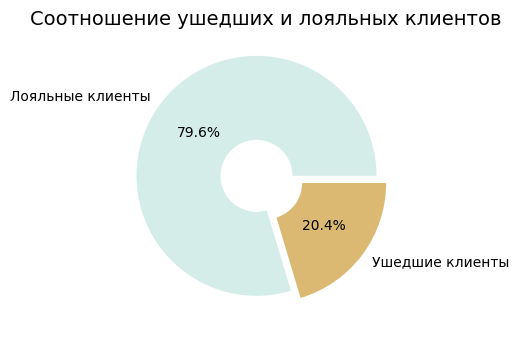

In [38]:
#9.1

churn_data['Exited_txt'] = churn_data.loc[:,'Exited'].replace(1,'Ушедшие клиенты').replace(0,"Лояльные клиенты")

fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([1, 1, 1, 1])

ex_count = churn_data['Exited_txt'].value_counts()
pie = ax.pie(
    ex_count,
    labels=ex_count.index,
    autopct='%1.1f%%',
    explode = [0.1, 0],
    wedgeprops=dict(width=0.7),
    colors={'#D4EDE9','#DBB972'}
)
title = ax.set_title('Cоотношение ушедших и лояльных клиентов', fontsize=14)

Основываясь на данных графика, можно сделать вывод, что соотношение ушедших клиентов к лояльным составляет 1:4. Одная пятая всех клиентов приняла решение об уходе из банка - показатель значительный, но не разрушительный. Необходимо дальнейшее исследование для выявления причинно-следственной связи.

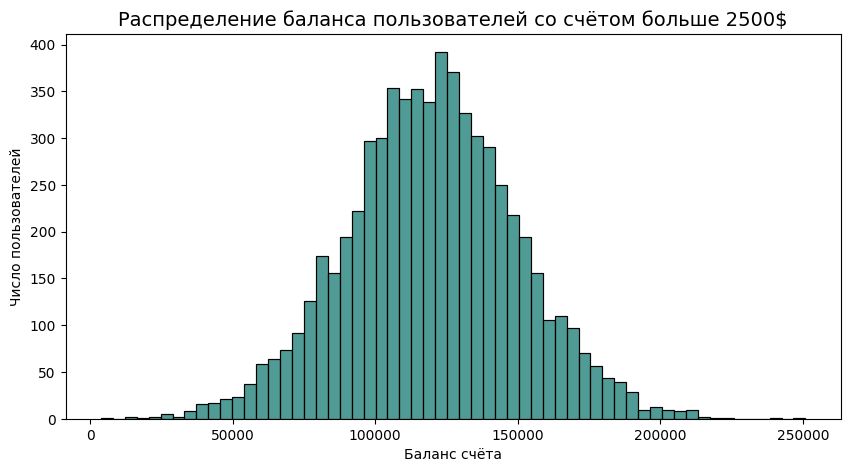

In [39]:
#9.2

res_data = churn_data.copy()
res_data = res_data[res_data['Balance'] > 2500]

fig = plt.figure(figsize=(10, 5))
histplot1 = sns.histplot(res_data['Balance'], color='#167A72')

histplot1.set_title('Распределение баланса пользователей со счётом больше 2500$', fontsize=14)
histplot1.set_xlabel('Баланс счёта')
histplot1.set_ylabel('Число пользователей');

На графике можно наблюдать классический пример нормального распределения, что говорит о том, что среднее значение встречается чаще всего, чем дальше от среднего - тем реже оно встречается. В данном случае большее количество пользователей банка имеет на счету от 110000 до 135000 долларов, более и менее богатые встречаются реже.

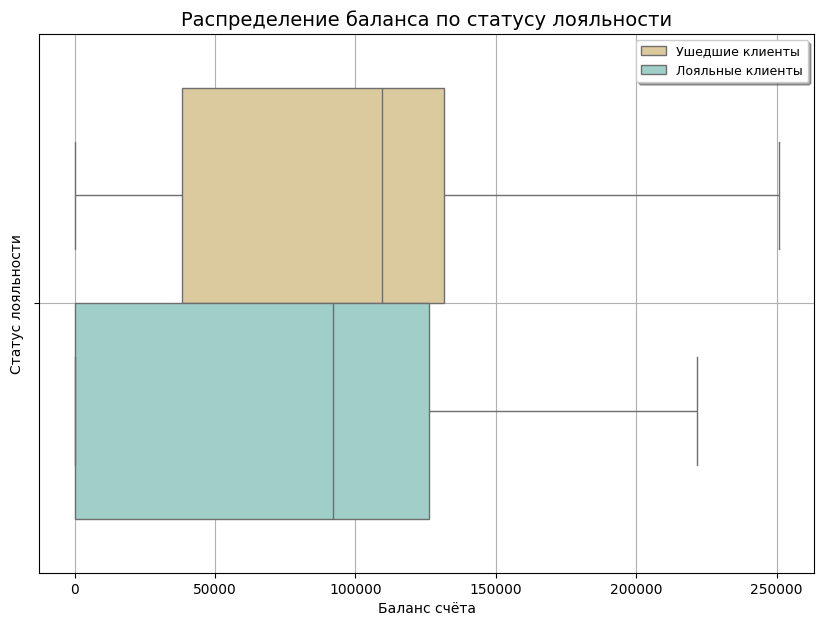

In [40]:
#9.3

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    palette='BrBG',
    hue='Exited_txt',
)
plt.legend(fontsize=9, shadow=True, framealpha=1)

boxplot.set_title('Распределение баланса по статусу лояльности', fontsize=14);
boxplot.set_xlabel('Баланс счёта');
boxplot.set_ylabel('Статус лояльности');
boxplot.grid()

Как было видно на предыдущей диаграмме и то, что подтверждает текущая - в распределении балансов нет выбросов, то есть нет нетипично богатых или бедных пользователей.<br>
Верхний квартиль обоих подмножеств имеет примерно одинаковое значение. Это говорит о том, что четверть выборки и тех и других клиентов емеет на счету больше 125000$.<br>
Половина лояльных клиентов в среднем имеет на счету около 90000$, а ушедших - примерно 115000$. Также можно сказать что достаточное количество лояльных клиентов имеет на счету меньше 5000$ - это может говорить о том, что это относительно новые клиенты банка, либо они хранят сбережения в другом банке, либо пользуются наличными. Тем не менее, можно предположить, чем меньше денег хранится в банке, тем меньше клиента заботят условия банка, их услуги и т.д., то есть вопрос об уходе даже не возникает. А вот когда через банк проходит регулярный оборот сбережений пользователей, их может интересовать что-то, что может предложить банк - в следствие чего можно быть удовлетворенным или неудовлетворенным.<br>
Банку необходимо удерживать клиентов с балансом более 5000$.

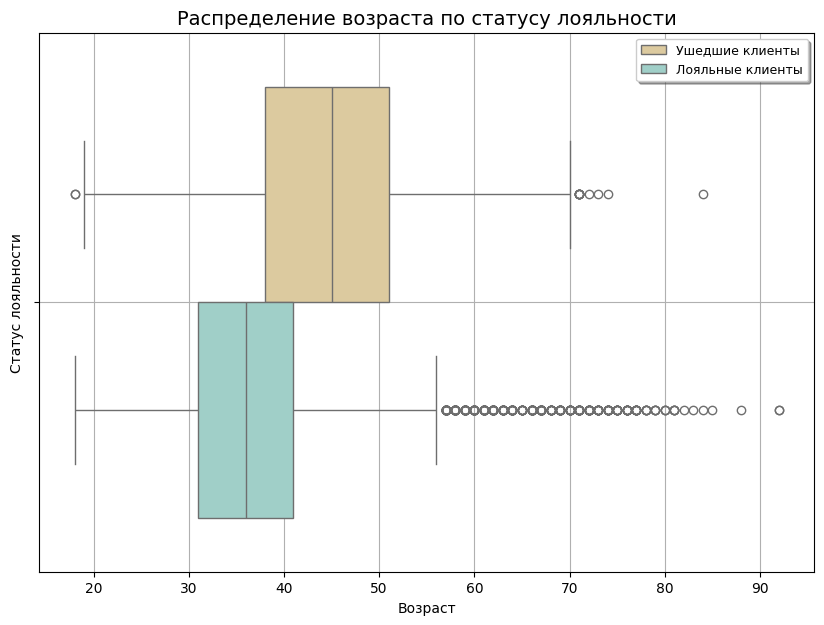

In [41]:
#9.4

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    hue='Exited_txt',
    palette='BrBG'
)
plt.legend(fontsize=9, shadow=True, framealpha=1)

boxplot.set_title('Распределение возраста по статусу лояльности', fontsize=14);
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Статус лояльности');
boxplot.grid()

Диаграмма показывает, что в группе лояльных клиентов больше потенциальных выбросов, что говорит о результате ошибок в данных (возможно) или о том что люди старше 55 очень редко используют банк для хранения сбережений, а если они и пришли в этот банк, то им скорее всего уже и не захочется рассматривать предложения других банков, в разрезе оттока эта группа рассматриваться не должна. <br>
А вот если говорить об ушедших клиентах, тут стоит обратить внимание на возрастную группу 38-51 год. Возможно в рассматриваемом банке хорошо развиты молодёжные программы (допустим, на покупку жилья), так как примерно в возрасте от 30 до 40 (устойчивая группа лояльных клиентов) человек обзаводится собственностью. А дальше банку предложить нечего.<br>

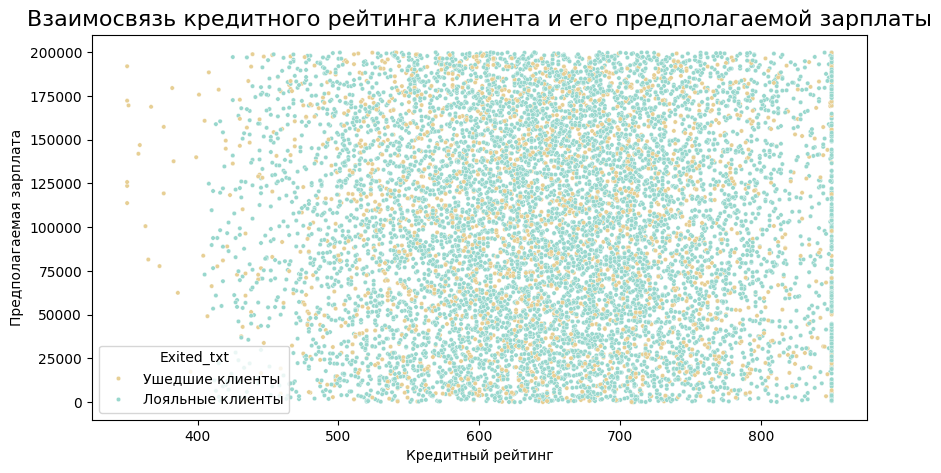

In [42]:
#9.5

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited_txt',
    s=10,
    sizes=(50, 300),
    palette='BrBG'
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата');

График исследования зависимости кредитного рейтинга и предполагаемой зарплаты показывает, что явная взаимосвязь отсутствует. Основная плотность пользователей сосредоточена в диапазоне кредитного рейтинга от 550 до 750 и в этом интервале находятся пользователи с любой возможной заработной платой.

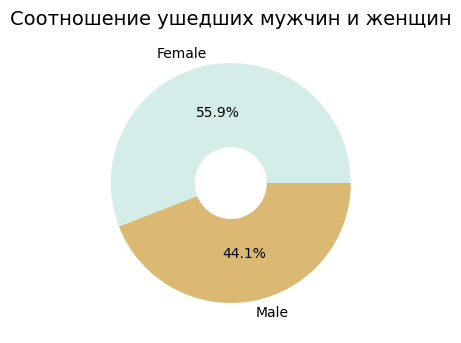

In [43]:
#9.6

fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([1, 1, 1, 1])

ex_count = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts()
pie = ax.pie(
    ex_count,
    labels=ex_count.index,
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.7),
    colors={'#D4EDE9','#DBB972'}
)
title = ax.set_title('Соотношение ушедших мужчин и женщин', fontsize=14)

Обращаясь к диаграмме, можно увидеть, что чаще из банка уходят женщины. 56% от общего числа ушедших пользователей составляют женщины, 44% - мужчины. Подавляющего различия не наблюдается, можно сделать вывод, что гендер не является признаком оттока (по крайней мере напрямую).

In [44]:
#9.7

fig = px.histogram(
    churn_data,
    x = 'NumOfProducts',
    color = 'Exited_txt',
    barmode = 'stack',
    text_auto = True,
    color_discrete_map={'Ушедшие клиенты': "#DBB972", 'Лояльные клиенты': "#76C6BA"}
)

fig.update_layout(
    title_text = 'Зависимость оттока от числа приобретённых услуг',
    xaxis_title_text = 'Количество приобретённых услуг',
    yaxis_title_text = 'Количество пользователей',
    legend_title_text = 'Статус лояльности',
    bargap = 0.2
)

fig.show()

На графике мы видим, что с увеличением числа приобретённых услуг, уменьшается и количество ушедших клиентов, стало быть чем больше банк продаёт услуг, чем больше их приобретает клиент, тем сильнее он привязан к банку. Но смотря на общее количество клиентов в разрезе количества услуг, можно заметить, что приобретение больше двух услуг в целом непопулярно и имеет схожий убывающий тренд: больше услуг - меньше клиентов.<br>
Также можно увидеть, что подавляющее число тех, кто приобретал более двух видов услуг - это ушедшие клиенты. Тех, кто приобрёл все 4 услуги, вообще не осталось в банке. Возможно стоит провести исследование по конкретным услугам или попросту не не тратить ресурсы на оформление за клиентом больше двух услуг.

In [45]:
#9.8

fig = px.histogram(
    churn_data,
    x = 'IsActiveMember',
    color = 'Exited_txt',
    text_auto = True,
    color_discrete_map={'Ушедшие клиенты': "#DBB972", 'Лояльные клиенты': "#76C6BA"}
)

fig.update_layout(
    title_text = 'Зависимость оттока от статуса активности',
    xaxis_title_text = 'Статус активности клиента',
    yaxis_title_text = 'Количество пользователей',
    legend_title_text = 'Статус лояльности',
    bargap = 0.2
)

fig.show()

На графике мы видим, что общее количество активных клиентов немного превышает количество неактивных. Но доля ушедших из активных клиентов примерно в два раза меньше, чем ушедшие со статусом неактивный.<br>
Можно сделать вывод, что активные клиенты реже принимают решение об уходе из банка, если последнее время статус его активности был "нулевым", то вероятно он просто тянул с закрытием счетов. <br>
Я бы рекомендовала тщательнее отслеживать активность клиентов и если за определённый период не наблюдалось никаких действий, предлагать программу лояльности, чтобы удержать пользователя.

In [46]:
#9.9
res_data2 = churn_data.groupby('Geography', as_index=False).sum()
res_data2['ratio'] = res_data2['Exited'] / res_data2['Exited'].sum()

fig = px.choropleth(
    data_frame=res_data2,
    locations="Geography", 
    locationmode = "country names",
    color="ratio", 
    range_color=[0, 1],
    title='Отток клиентов по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Greens' 
)
fig.update_geos(fitbounds="locations", visible=True, scope="europe")
fig.show()


Доли ушедших клиентов в Германии и Франции отличаются на две тысячных и составляют примерно по 40%. Оставшиеся 20% ушедших клиентов принадлежат Испании. Могу предположить, что центральный офис банка находится в Испании, что даёт возможность для эффективного и более оперативного управления, тогда как возникающие проблемы в филиалах других стран регулируются не так быстро и качественно.

In [47]:
#9.9
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_df = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
).round(2)

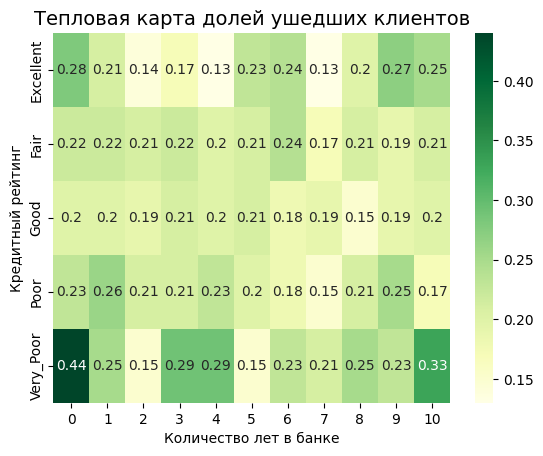

In [49]:
heatmap = sns.heatmap(
    data=pivot_df, 
    cmap='YlGn',
    annot=True
)
heatmap.set_title('Тепловая карта долей ушедших клиентов', fontsize=14)
heatmap.set_xlabel('Количество лет в банке')
heatmap.set_ylabel('Кредитный рейтинг');


Основываясь на данных полученной карты, можно заявить, что уход клиентов практически не зависит от количества лет, в течение которых они пользуются услугами банка. Наблюдается совсем небольшой сдвиг после пяти лет, возможно после такого количества лет обслуживания, клиенты становятся более лояльны.<br>
Но что касается групп пользователей с безупречным и самым слабым рейтингом, то для них можно проследить закономерность с количеством лет в банке: в первые и последние годы пользования услугами банка, клиенты покидают его чаще всего. Скорее это связано с тем, что люди с высоким доверием банковской системы могут позволить себе выбрать наилучшие предложения от любого банка, поэтому их отток наиболее вероятен, как и у клиентов с плохой репутацией. Они покидают банк скорее всего из-за отказов.<br>
А вот если говорить в общем о зависимости от кредитного рейтинга - тенденция хорошо видна. Этот признак может повлиять на отток клиентов, поскольку клиент с более высоким кредитным рейтингом с меньшей вероятностью покинет банк, что хорошо видно на карте. Особенно для рейтингов Poor, Good и Fair - это наиболее стабильные клиенты вне зависимости от лет. <br>